In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [4]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [135]:
df_f = df.groupby(pd.Grouper(key='Day', freq='Y')).mean()
print(df_f.max()[0],df_f.idxmax()[0].year)
print(df_f.min()[0],df_f.idxmin()[0].year)

9.07945205479452 2015
6.980821917808219 2012


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [141]:
df_f = df[(df['Day'].dt.month == 1) & (df['t'] >= 0)]
years = {t.year for t in df['Day']}
pos_days = {}
for y in years:
    seriesObj = df_f.apply(lambda x: True if x['Day'].year == y else False , axis=1)
    pos_days[y] = len(seriesObj[seriesObj == True].index)
max_year = max(pos_days, key=pos_days.get)
print(max_year, 'год', pos_days[max_year], 'дней')

2008 год 19 дней


**3.** В каком году было самое холодное лето (по средней температуре)

In [151]:
df_leto = df[(df['Day'].dt.month == 6) | (df['Day'].dt.month == 7) | (df['Day'].dt.month == 8)]
df_f = df_leto.groupby(pd.Grouper(key='Day', freq='Y')).mean()

print(df_f.idxmin()[0].year, df_f.min()[0])

2008 18.119565217391305


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [152]:
df_diff = df['t'].diff().abs()
print(df.loc[df_diff.idxmax()][0].date(), 'diff =', df_diff.max())

2014-05-27 diff = 15.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

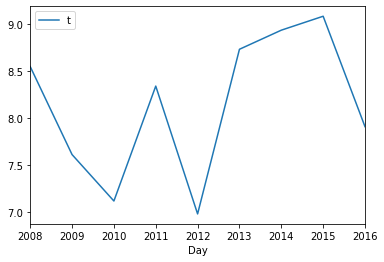

In [134]:
df_f = df.groupby(pd.Grouper(key='Day', freq='Y')).mean().plot()